# Fazer uma análise exploratória dos dados de vendas de um supermercado entre 2015 e 2018 através do aplicativo

### O gerente solicitou um levantamento dos dados de vendas para saber os locais onde mais vende, se o desconto afeta na quantidade de vendas, se as vendas cresceram ou diminuiram com o tempo e quais os produtos que mais saem

In [73]:
#Ler o csv e mostrar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_vendas = pd.read_csv("dados supermercado.csv")
display(df_vendas)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [74]:
#Verificar tipos, nulos e eliminar dados desnecessários
df_vendas.dtypes
df_vendas.isna().sum()

df_vendas = df_vendas.drop(columns=['Order ID', 'Customer Name'])

In [75]:
#As vendas são feitas em apenas um estado, então não há necessidade da coluna estado também
df_vendas['State'].value_counts()
df_vendas = df_vendas.drop(columns='State')

In [76]:
#Formatar as datas que estavam com '/' no lugar de '-'
dia_noformat = (df_vendas['Order Date'].str[1] == '/')
dia2_noformat = (df_vendas['Order Date'].str[2] == '/')

df_vendas.loc[dia_noformat, 'Order Date'] = df_vendas.loc[dia_noformat, 'Order Date'].str.replace('/', '-')
df_vendas.loc[dia2_noformat, 'Order Date'] = df_vendas.loc[dia2_noformat, 'Order Date'].str.replace('/', '-')

In [77]:
#Transformar em data
df_vendas['Order Date'] = pd.to_datetime(df_vendas['Order Date'])

In [78]:
#Separar data
df_vendas['Order Year'] = df_vendas['Order Date'].dt.year
df_vendas['Order Month'] = df_vendas['Order Date'].dt.month
df_vendas['Order Day'] = df_vendas['Order Date'].dt.day

#Dropar coluna da data inteira
df_vendas = df_vendas.drop(columns='Order Date')

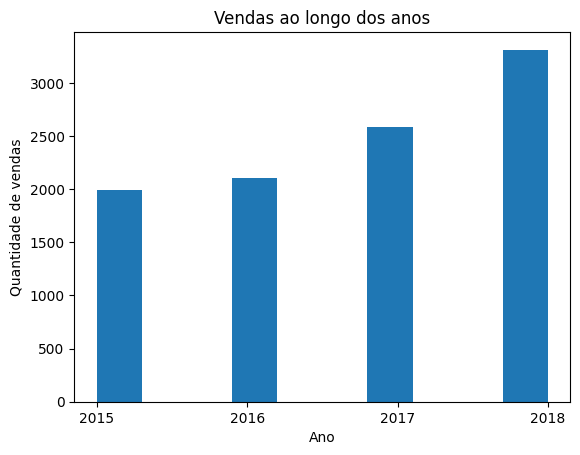

In [79]:
#Verificar a variação dos pedidos e lucro ao longo dos anos 
plt.hist(df_vendas['Order Year'])
plt.title('Vendas ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de vendas')
plt.xticks(df_vendas['Order Year'].unique())
plt.show()

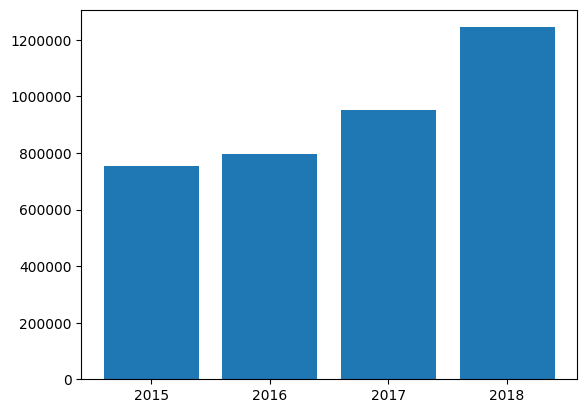

In [80]:
#Lucro ao longo dos anos
anos = [2015, 2016, 2017, 2018]
lucro_anual = []

for i in anos:
    df_vendas_ano = df_vendas.loc[df_vendas['Order Year'] == i]
    lucro = df_vendas_ano['Profit'].sum()
    lucro_anual.append(lucro)

plt.bar(anos, lucro_anual)
plt.ticklabel_format(style='plain')
plt.xticks(anos)
plt.show()

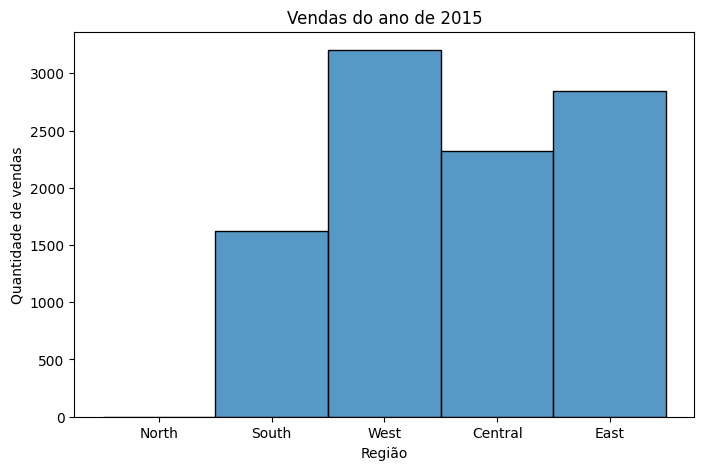

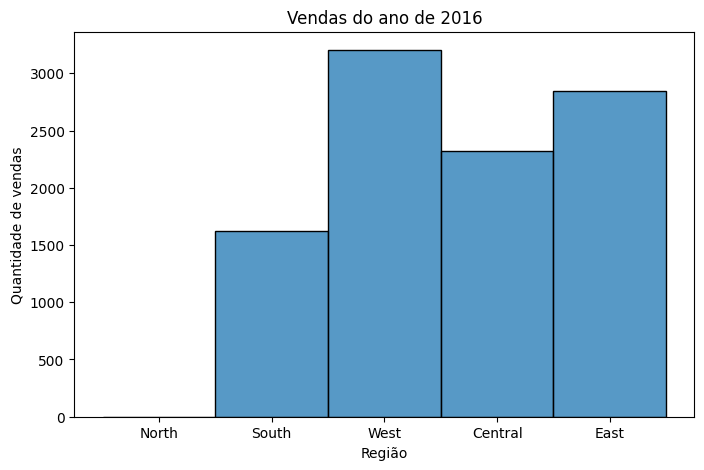

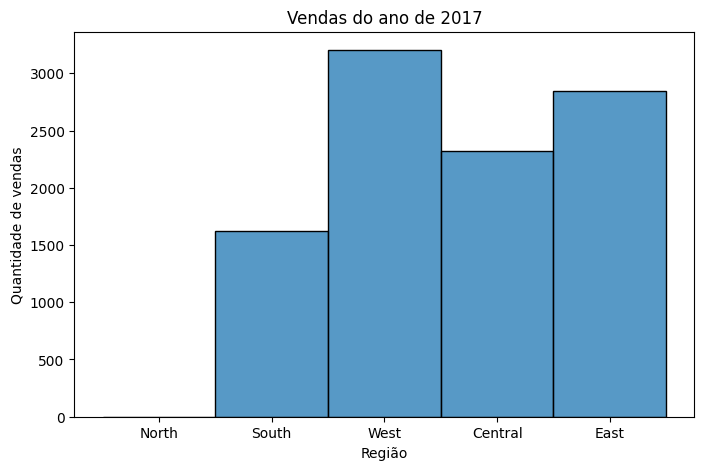

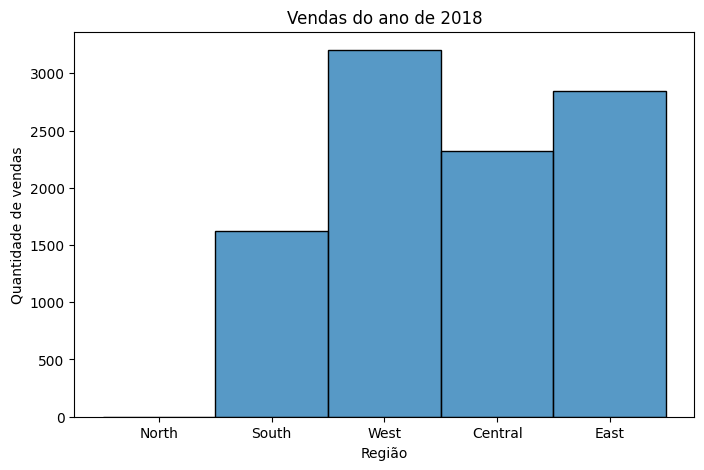

In [81]:
#Verificar quais regiões compram mais por ano
anos = [2015, 2016, 2017, 2018]

for i in anos:
    df_vendas_ano = df_vendas.loc[df_vendas['Order Year'] == i]
    plt.figure(figsize=(8,5))
    sns.histplot(df_vendas['Region'], binwidth=0.3)
    plt.title(f'Vendas do ano de {i}')
    plt.xlabel('Região')
    plt.ylabel('Quantidade de vendas')
    plt.show()
    

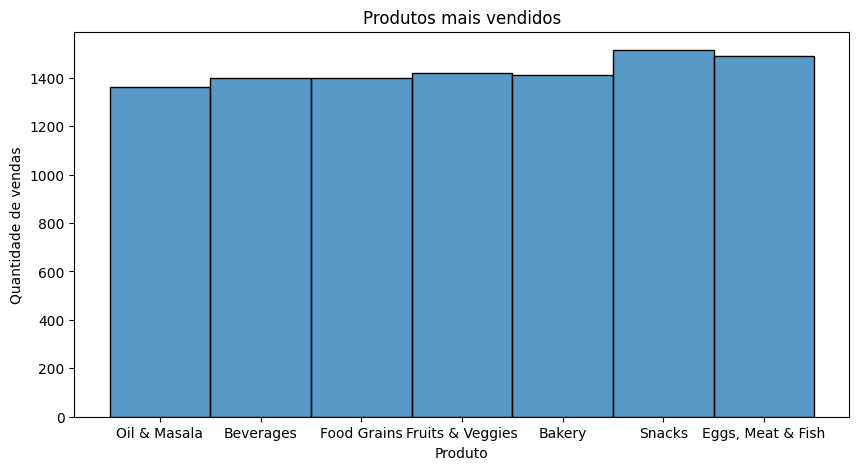

In [82]:
plt.figure(figsize=(10,5))
sns.histplot(df_vendas['Category'], binwidth=1.5)
plt.title('Produtos mais vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade de vendas')
plt.show()

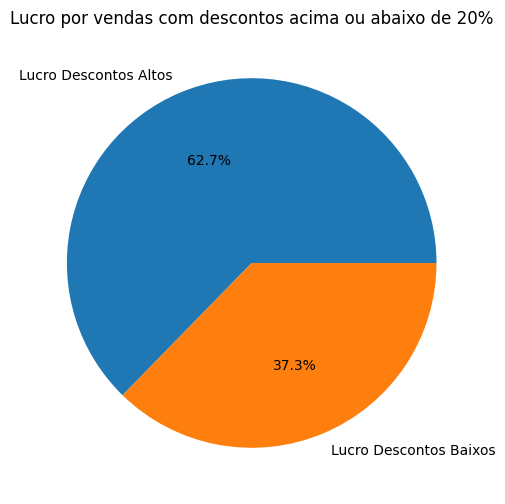

In [85]:
df_dca = df_vendas.loc[df_vendas['Discount'] >= 0.20]
df_dcb = df_vendas.loc[df_vendas['Discount'] < 0.20]

lucro_dca = df_dca['Profit'].sum()
lucro_dcb = df_dcb['Profit'].sum()

lucros = [lucro_dca, lucro_dcb]

ctg = ['Lucro Descontos Altos', 'Lucro Descontos Baixos']

plt.figure(figsize=(6, 6))
plt.pie(lucros, labels=ctg, autopct='%1.1f%%')
plt.title("Lucro por vendas com descontos acima ou abaixo de 20%")
plt.show()

### Com isso podemos concluir que:

- As vendas aumentaram ao longo dos anos.
- O lucro aumentou com as vendas.
- A região oeste predomina nas vendas enquanto o norte não faz pedidos.
- Os produtos tem uma variante baixa de vendas entre categorias.
- Os descontos acima de 20% até 35% impactam em um consumo maior de produtos, ou seja, trazem mais lucro.